<h1><center>IMAGE SEGMENTATION</center></h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import os
import cv2
import numpy as np
from time import time
from PIL import Image
%matplotlib inline

In [2]:
def change_color_fuzzycmeans(cluster_membership, clusters):
    img = []
    for pix in cluster_membership.T:
        img.append(clusters[np.argmax(pix)])
    return img

def readimage(x):
    folder = x
    list_images = os.listdir(folder)
    list_img = []
    for i in list_images:
        path = folder+i
        print(path)
        img = cv2.imread(path)
        rgb_img = img.reshape((img.shape[0] * img.shape[1], 3))
        list_img.append(rgb_img)
        
    return list_img
            
def imclearborder(imgBW):

    # Given a black and white image, first find all of its contours
    radius = 2
    imgBWcopy = imgBW.copy()
    contours,hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Get dimensions of image
    imgRows = imgBW.shape[0]
    imgCols = imgBW.shape[1]    

    contourList = [] # ID list of contours that touch the border

    # For each contour...
    for idx in np.arange(len(contours)):
        # Get the i'th contour
        cnt = contours[idx]

        # Look at each point in the contour
        for pt in cnt:
            rowCnt = pt[0][1]
            colCnt = pt[0][0]

            # If this is within the radius of the border
            check1 = (rowCnt >= 0 and rowCnt < radius) or (rowCnt >= imgRows-1-radius and rowCnt < imgRows)
            check2 = (colCnt >= 0 and colCnt < radius) or (colCnt >= imgCols-1-radius and colCnt < imgCols)

            if check1 or check2:
                contourList.append(idx)
                break

    for idx in contourList:
        cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy

#### bwareaopen definition
def bwareaopen(imgBW, areaPixels):
    # Given a black and white image, first find all of its contours
    imgBWcopy = imgBW.copy()
    contours, hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # For each contour, determine its total occupying area
    for idx in np.arange(len(contours)):
        area = cv2.contourArea(contours[idx])
        if (area >= 0 and area <= areaPixels):
            cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy      

def imfill(im_th):
    
    im_floodfill = im_th.copy()
    # Mask used to flood filling.
    
    # Notice the size needs to be 2 pixels than the image.
    h, w = im_th.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (0,0), 255);

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    im_out = im_th | im_floodfill_inv
    
    return im_out

In [3]:
list_img_y = readimage('Enhanced/yes/')

Enhanced/yes/EYES1.jpg
Enhanced/yes/EYES10.jpg
Enhanced/yes/EYES100.jpg
Enhanced/yes/EYES1000.jpg
Enhanced/yes/EYES1001.jpg
Enhanced/yes/EYES1002.jpg
Enhanced/yes/EYES1003.jpg
Enhanced/yes/EYES1004.jpg
Enhanced/yes/EYES1005.jpg
Enhanced/yes/EYES1006.jpg
Enhanced/yes/EYES1007.jpg
Enhanced/yes/EYES1008.jpg
Enhanced/yes/EYES1009.jpg
Enhanced/yes/EYES101.jpg
Enhanced/yes/EYES1010.jpg
Enhanced/yes/EYES1011.jpg
Enhanced/yes/EYES1012.jpg
Enhanced/yes/EYES1013.jpg
Enhanced/yes/EYES1014.jpg
Enhanced/yes/EYES1015.jpg
Enhanced/yes/EYES1016.jpg
Enhanced/yes/EYES1017.jpg
Enhanced/yes/EYES1018.jpg
Enhanced/yes/EYES1019.jpg
Enhanced/yes/EYES102.jpg
Enhanced/yes/EYES1020.jpg
Enhanced/yes/EYES1021.jpg
Enhanced/yes/EYES1022.jpg
Enhanced/yes/EYES1023.jpg
Enhanced/yes/EYES1024.jpg
Enhanced/yes/EYES1025.jpg
Enhanced/yes/EYES1026.jpg
Enhanced/yes/EYES1027.jpg
Enhanced/yes/EYES1028.jpg
Enhanced/yes/EYES1029.jpg
Enhanced/yes/EYES103.jpg
Enhanced/yes/EYES1030.jpg
Enhanced/yes/EYES1031.jpg
Enhanced/yes/EYES1032

Enhanced/yes/EYES327.jpg
Enhanced/yes/EYES328.jpg
Enhanced/yes/EYES329.jpg
Enhanced/yes/EYES33.jpg
Enhanced/yes/EYES330.jpg
Enhanced/yes/EYES331.jpg
Enhanced/yes/EYES332.jpg
Enhanced/yes/EYES333.jpg
Enhanced/yes/EYES334.jpg
Enhanced/yes/EYES335.jpg
Enhanced/yes/EYES336.jpg
Enhanced/yes/EYES337.jpg
Enhanced/yes/EYES338.jpg
Enhanced/yes/EYES339.jpg
Enhanced/yes/EYES34.jpg
Enhanced/yes/EYES340.jpg
Enhanced/yes/EYES341.jpg
Enhanced/yes/EYES342.jpg
Enhanced/yes/EYES343.jpg
Enhanced/yes/EYES344.jpg
Enhanced/yes/EYES345.jpg
Enhanced/yes/EYES346.jpg
Enhanced/yes/EYES347.jpg
Enhanced/yes/EYES348.jpg
Enhanced/yes/EYES349.jpg
Enhanced/yes/EYES35.jpg
Enhanced/yes/EYES350.jpg
Enhanced/yes/EYES351.jpg
Enhanced/yes/EYES352.jpg
Enhanced/yes/EYES353.jpg
Enhanced/yes/EYES354.jpg
Enhanced/yes/EYES355.jpg
Enhanced/yes/EYES356.jpg
Enhanced/yes/EYES357.jpg
Enhanced/yes/EYES358.jpg
Enhanced/yes/EYES359.jpg
Enhanced/yes/EYES36.jpg
Enhanced/yes/EYES360.jpg
Enhanced/yes/EYES361.jpg
Enhanced/yes/EYES362.jpg
Enha

Enhanced/yes/EYES625.jpg
Enhanced/yes/EYES626.jpg
Enhanced/yes/EYES627.jpg
Enhanced/yes/EYES628.jpg
Enhanced/yes/EYES629.jpg
Enhanced/yes/EYES63.jpg
Enhanced/yes/EYES630.jpg
Enhanced/yes/EYES631.jpg
Enhanced/yes/EYES632.jpg
Enhanced/yes/EYES633.jpg
Enhanced/yes/EYES634.jpg
Enhanced/yes/EYES635.jpg
Enhanced/yes/EYES636.jpg
Enhanced/yes/EYES637.jpg
Enhanced/yes/EYES638.jpg
Enhanced/yes/EYES639.jpg
Enhanced/yes/EYES64.jpg
Enhanced/yes/EYES640.jpg
Enhanced/yes/EYES641.jpg
Enhanced/yes/EYES642.jpg
Enhanced/yes/EYES643.jpg
Enhanced/yes/EYES644.jpg
Enhanced/yes/EYES645.jpg
Enhanced/yes/EYES646.jpg
Enhanced/yes/EYES647.jpg
Enhanced/yes/EYES648.jpg
Enhanced/yes/EYES649.jpg
Enhanced/yes/EYES65.jpg
Enhanced/yes/EYES650.jpg
Enhanced/yes/EYES651.jpg
Enhanced/yes/EYES652.jpg
Enhanced/yes/EYES653.jpg
Enhanced/yes/EYES654.jpg
Enhanced/yes/EYES655.jpg
Enhanced/yes/EYES656.jpg
Enhanced/yes/EYES657.jpg
Enhanced/yes/EYES658.jpg
Enhanced/yes/EYES659.jpg
Enhanced/yes/EYES66.jpg
Enhanced/yes/EYES660.jpg
Enha

Enhanced/yes/EYES927.jpg
Enhanced/yes/EYES928.jpg
Enhanced/yes/EYES929.jpg
Enhanced/yes/EYES93.jpg
Enhanced/yes/EYES930.jpg
Enhanced/yes/EYES931.jpg
Enhanced/yes/EYES932.jpg
Enhanced/yes/EYES933.jpg
Enhanced/yes/EYES934.jpg
Enhanced/yes/EYES935.jpg
Enhanced/yes/EYES936.jpg
Enhanced/yes/EYES937.jpg
Enhanced/yes/EYES938.jpg
Enhanced/yes/EYES939.jpg
Enhanced/yes/EYES94.jpg
Enhanced/yes/EYES940.jpg
Enhanced/yes/EYES941.jpg
Enhanced/yes/EYES942.jpg
Enhanced/yes/EYES943.jpg
Enhanced/yes/EYES944.jpg
Enhanced/yes/EYES945.jpg
Enhanced/yes/EYES946.jpg
Enhanced/yes/EYES947.jpg
Enhanced/yes/EYES948.jpg
Enhanced/yes/EYES949.jpg
Enhanced/yes/EYES95.jpg
Enhanced/yes/EYES950.jpg
Enhanced/yes/EYES951.jpg
Enhanced/yes/EYES952.jpg
Enhanced/yes/EYES953.jpg
Enhanced/yes/EYES954.jpg
Enhanced/yes/EYES955.jpg
Enhanced/yes/EYES956.jpg
Enhanced/yes/EYES957.jpg
Enhanced/yes/EYES958.jpg
Enhanced/yes/EYES959.jpg
Enhanced/yes/EYES96.jpg
Enhanced/yes/EYES960.jpg
Enhanced/yes/EYES961.jpg
Enhanced/yes/EYES962.jpg
Enha

In [4]:
def fuzzycmeans(list_img):
    segmented_images = []
    for index,rgb_img in enumerate(list_img):
        img = np.reshape(rgb_img, (128,128,3)).astype(np.uint8)
        shape = np.shape(img)
        
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        rgb_img.T, 13, 2, error=0.005, maxiter=1000, init=None,seed=42)

        new_img = change_color_fuzzycmeans(u,cntr)
        
        fuzzy_img = np.reshape(new_img,shape).astype(np.uint8)
        
        ret, seg_img = cv2.threshold(fuzzy_img,np.max(fuzzy_img)-1,255,cv2.THRESH_BINARY)
        
        seg_img_1d = seg_img[:,:,1]
        
        bwfim1 = bwareaopen(seg_img_1d, 100)
        bwfim2 = imclearborder(bwfim1)
        bwfim3 = imfill(bwfim2)

        segmented_images.append(bwfim3)
    return segmented_images

In [5]:
seg_yes = []

In [6]:
seg_yes = fuzzycmeans(list_img_y)

In [8]:
list_img_n = readimage('Enhanced/no/')

Enhanced/no/ENO1.jpg
Enhanced/no/ENO10.jpg
Enhanced/no/ENO100.jpg
Enhanced/no/ENO101.jpg
Enhanced/no/ENO102.jpg
Enhanced/no/ENO103.jpg
Enhanced/no/ENO104.jpg
Enhanced/no/ENO105.jpg
Enhanced/no/ENO106.jpg
Enhanced/no/ENO107.jpg
Enhanced/no/ENO108.jpg
Enhanced/no/ENO109.jpg
Enhanced/no/ENO11.jpg
Enhanced/no/ENO110.jpg
Enhanced/no/ENO111.jpg
Enhanced/no/ENO112.jpg
Enhanced/no/ENO113.jpg
Enhanced/no/ENO114.jpg
Enhanced/no/ENO115.jpg
Enhanced/no/ENO116.jpg
Enhanced/no/ENO117.jpg
Enhanced/no/ENO118.jpg
Enhanced/no/ENO119.jpg
Enhanced/no/ENO12.jpg
Enhanced/no/ENO120.jpg
Enhanced/no/ENO121.jpg
Enhanced/no/ENO122.jpg
Enhanced/no/ENO123.jpg
Enhanced/no/ENO124.jpg
Enhanced/no/ENO125.jpg
Enhanced/no/ENO126.jpg
Enhanced/no/ENO127.jpg
Enhanced/no/ENO128.jpg
Enhanced/no/ENO129.jpg
Enhanced/no/ENO13.jpg
Enhanced/no/ENO130.jpg
Enhanced/no/ENO131.jpg
Enhanced/no/ENO132.jpg
Enhanced/no/ENO133.jpg
Enhanced/no/ENO134.jpg
Enhanced/no/ENO135.jpg
Enhanced/no/ENO136.jpg
Enhanced/no/ENO137.jpg
Enhanced/no/ENO13

Enhanced/no/ENO440.jpg
Enhanced/no/ENO441.jpg
Enhanced/no/ENO442.jpg
Enhanced/no/ENO443.jpg
Enhanced/no/ENO444.jpg
Enhanced/no/ENO445.jpg
Enhanced/no/ENO446.jpg
Enhanced/no/ENO447.jpg
Enhanced/no/ENO448.jpg
Enhanced/no/ENO449.jpg
Enhanced/no/ENO45.jpg
Enhanced/no/ENO450.jpg
Enhanced/no/ENO451.jpg
Enhanced/no/ENO452.jpg
Enhanced/no/ENO453.jpg
Enhanced/no/ENO454.jpg
Enhanced/no/ENO455.jpg
Enhanced/no/ENO456.jpg
Enhanced/no/ENO457.jpg
Enhanced/no/ENO458.jpg
Enhanced/no/ENO459.jpg
Enhanced/no/ENO46.jpg
Enhanced/no/ENO460.jpg
Enhanced/no/ENO461.jpg
Enhanced/no/ENO462.jpg
Enhanced/no/ENO463.jpg
Enhanced/no/ENO464.jpg
Enhanced/no/ENO465.jpg
Enhanced/no/ENO466.jpg
Enhanced/no/ENO467.jpg
Enhanced/no/ENO468.jpg
Enhanced/no/ENO469.jpg
Enhanced/no/ENO47.jpg
Enhanced/no/ENO470.jpg
Enhanced/no/ENO471.jpg
Enhanced/no/ENO472.jpg
Enhanced/no/ENO473.jpg
Enhanced/no/ENO474.jpg
Enhanced/no/ENO475.jpg
Enhanced/no/ENO476.jpg
Enhanced/no/ENO477.jpg
Enhanced/no/ENO478.jpg
Enhanced/no/ENO479.jpg
Enhanced/no/EN

Enhanced/no/ENO763.jpg
Enhanced/no/ENO764.jpg
Enhanced/no/ENO765.jpg
Enhanced/no/ENO766.jpg
Enhanced/no/ENO767.jpg
Enhanced/no/ENO768.jpg
Enhanced/no/ENO769.jpg
Enhanced/no/ENO77.jpg
Enhanced/no/ENO770.jpg
Enhanced/no/ENO771.jpg
Enhanced/no/ENO772.jpg
Enhanced/no/ENO773.jpg
Enhanced/no/ENO774.jpg
Enhanced/no/ENO775.jpg
Enhanced/no/ENO776.jpg
Enhanced/no/ENO777.jpg
Enhanced/no/ENO778.jpg
Enhanced/no/ENO779.jpg
Enhanced/no/ENO78.jpg
Enhanced/no/ENO780.jpg
Enhanced/no/ENO781.jpg
Enhanced/no/ENO782.jpg
Enhanced/no/ENO783.jpg
Enhanced/no/ENO784.jpg
Enhanced/no/ENO785.jpg
Enhanced/no/ENO786.jpg
Enhanced/no/ENO787.jpg
Enhanced/no/ENO788.jpg
Enhanced/no/ENO789.jpg
Enhanced/no/ENO79.jpg
Enhanced/no/ENO790.jpg
Enhanced/no/ENO791.jpg
Enhanced/no/ENO792.jpg
Enhanced/no/ENO793.jpg
Enhanced/no/ENO794.jpg
Enhanced/no/ENO795.jpg
Enhanced/no/ENO796.jpg
Enhanced/no/ENO797.jpg
Enhanced/no/ENO798.jpg
Enhanced/no/ENO799.jpg
Enhanced/no/ENO8.jpg
Enhanced/no/ENO80.jpg
Enhanced/no/ENO800.jpg
Enhanced/no/ENO80

In [9]:
seg_no = []
seg_no = fuzzycmeans(list_img_n)

In [10]:
for i in range(len(seg_no)):
    new = Image.fromarray(seg_no[i])
    new = new.convert('RGB')
    new.save('{}{}{}'.format('/Users/Aarsh/Desktop/AScratch/Segmented/no/N',i+1,'.jpg'))

In [7]:
for i in range(len(seg_yes)):
    new = Image.fromarray(seg_yes[i])
    new = new.convert('RGB')
    new.save('{}{}{}'.format('/Users/Aarsh/Desktop/AScratch/Segmented/yes/Y',i+1,'.jpg'))

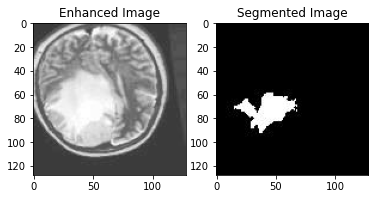

In [14]:
pil_imE = Image.open('Enhanced/yes/EYES1.jpg')
pil_imS = Image.open('Segmented/yes/Y1.jpg')
im_arrayE = np.asarray(pil_imE)
im_arrayS = np.asarray(pil_imS)

plt.subplot(1, 2, 1)
plt.imshow(im_arrayE)
plt.title('Enhanced Image')

plt.subplot(1, 2, 2)
plt.imshow(im_arrayS)
plt.title('Segmented Image')

plt.show()

## REFERENCE:
Hajibabaei, N., & Firoozbakht, M. (2015, November). Image segmentation using a modified fuzzy C-means clustering. In 2015 2nd International Conference on Knowledge-Based Engineering and Innovation (KBEI) (pp. 625-631). IEEE.